**Brian Blaylock**  
*July 20, 2021*

# HRRR Data

There are different products available on the cloud.

In [2]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
H = Herbie('2021-07-19', 
           model='hrrr', 
           product='sfc')

🏋🏻‍♂️ Found 2021-Jul-19 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [4]:
x = H.xarray('TMP:2 m above')

📇 Download subset: [HRRR] model [sfc] product run at 2021-Jul-19 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210719/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=71  TMP:2 m above ground:anl


Text(0.0, 1.0, 'HRRR: 2D surface level fields; 3-km resolution')

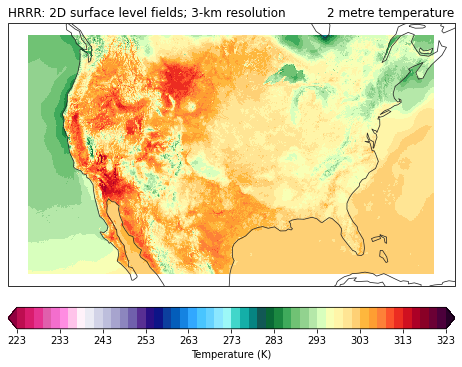

In [10]:
ax = common_features(crs=x.herbie.crs, figsize=[8,8])
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')